(398, 30)
(398,)
(171, 30)
(171,)
Accuracy: 0.9590643274853801
[[103   5]
 [  2  61]]
TP = 61
TN = 103
FP = 5
FN = 2


/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Specificity =  0.9537037037037037
Sensitivity =  0.9682539682539683
Precision: [0.98095238 0.92424242]
Recall: [0.9537037  0.96825397]
F-score: [0.96713615 0.94573643]
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       108
           1       0.92      0.97      0.95        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



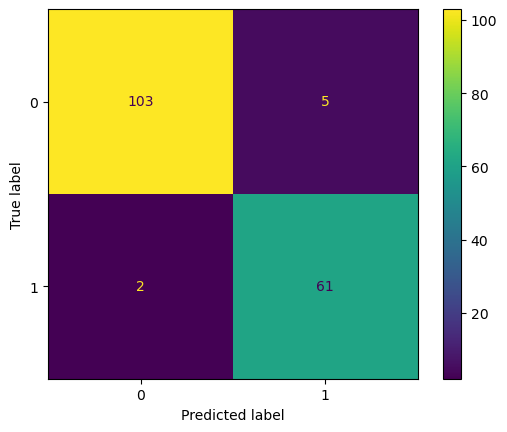

In [1]:
#Import libraries
import pandas as pd

#Read the csv file to a dataframe
df = pd.read_csv('cancer.csv')

#Show the dataframe
df.head(5)

#Separate the features 
features = df.drop('diagnosis', axis = 'columns')

#Separate the target
target = df['diagnosis']

#Assigning to conventional variables, the features and target
X_train = features
Y_train = target

#Split the datset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.3, random_state=0)
#random_state = 0; we get the same train and test sets across different executions

#Print the dimension of train and test data
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

## Logic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# Train Logistic Regression model
model.fit(X_train,Y_train)

#Predict the response for test dataset
Y_pred = model.predict(X_test)

# Model Accuracy, irrespectove of benign or malignant?
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

#Get the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

TN = cm[0][0]
FN = cm[1][0]
FP = cm[0][1]
TP = cm[1][1]

print ('TP =', TP)
print ('TN =', TN)
print ('FP =', FP)
print ('FN =', FN)

#print confusion matrix plot
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, Y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

#print specificity
print('Specificity = ', TN / (TN + FP))

#Print sensitivity
print('Sensitivity = ', TP / (TP + FN))

# print Precision
from sklearn import metrics
print("Precision:",metrics.precision_score(Y_test, Y_pred, average = None))

#print Recall
from sklearn import metrics
print("Recall:",metrics.recall_score(Y_test, Y_pred, average = None))

# print f1 score
from sklearn import metrics
print("F-score:",metrics.f1_score(Y_test, Y_pred, average = None))

#print classification report 
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))